In [113]:
import pandas as pd


In [114]:
# settings
dim = 4

In [115]:
# load results
df = pd.read_csv(
    "./twitter_alpha-0.1_beta-0.1_ws-10_neg-5_lr-0.025_icom-62_ind-62_k-7_ds-0.0.txt",
    sep="\t",
    header=None,
    names=["X"]
)

# load labels
labels = pd.read_csv(
    "./twitter.labels",
    sep="\t",
    header=None,
    names=["y"]
)

In [116]:
# split dimensions
df = df.join(df["X"].str.split(" ", n = dim, expand = True), rsuffix="x")

# join labels
df = df.join(labels)

# rename columns 
df = df.rename(columns=dict((i, "x"+str(i)) for i in range(dim)))

# set types
for i in range(dim):
    df["x"+ str(i)] = df["x" + str(i)].astype(float)
df["y"] = df["y"].astype(int)


In [117]:
display(df.describe())
display(df.head())

,x0,x1,x2,x3,y
count,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000
mean,0.684424,0.478790,0.382459,-0.687081,2.211222
std,0.684940,0.527378,0.560899,0.536026,1.707769
min,-0.375446,-1.065460,-2.248750,-3.735260,0.000000
25%,0.202869,0.117874,0.145573,-0.965226,2.000000
50%,0.531222,0.437165,0.384565,-0.638598,2.000000
75%,1.048600,0.794229,0.741995,-0.346967,2.000000
max,7.693060,4.719260,2.323030,1.265760,7.000000


,X,x0,x1,x2,x3,y
0,0.200339 0.931012 0.285464 -0.689365,0.200339,0.931012,0.285464,-0.689365,6
1,0.513859 0.909619 0.348804 -0.329911,0.513859,0.909619,0.348804,-0.329911,4
2,0.220539 1.09661 0.161531 -0.621415,0.220539,1.096610,0.161531,-0.621415,6
3,0.0591839 0.43559 0.688594 -1.03164,0.059184,0.435590,0.688594,-1.031640,2
4,0.130965 1.31155 0.380458 -0.578007,0.130965,1.311550,0.380458,-0.578007,5


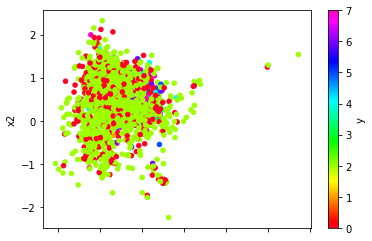

In [122]:
# plot all Xs in 2D
for in in range(dim):
    for j in range(dim):
        df.plot(x="x", y="x2", c="y", kind="scatter", colormap='gist_rainbow')